In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']

In [2]:
vectorizer = CountVectorizer()
# create a term-document matrix: assign each word a tuple: 
# first number is the sentence, and the second is the unique number that corresponds to the word
# for example, if the word "one" is assigned the number 3,
# then the word "one" that is used in the third sentence is represented by the tuple (2,3)
X = vectorizer.fit_transform(sentences)

# from the term-document matrix, create the BoW matrix
print(X.toarray())


[[0 1 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 1]]


In [3]:
sentences = ['Data Science is the best.',
             'Data Science has cool topics.',
             'Are these the best topics?',
             'Is Data Science the best track?']

In [4]:
vectorizer = CountVectorizer()
# create a term-document matrix: assign each word a tuple: 
# first number is the sentence, and the second is the unique number that corresponds to the word
# for example, if the word "one" is assigned the number 3,
# then the word "one" that is used in the third sentence is represented by the tuple (2,3)
X = vectorizer.fit_transform(sentences)

# from the term-document matrix, create the BoW matrix
print(X.toarray())

[[0 1 0 1 0 1 1 1 0 0 0]
 [0 0 1 1 1 0 1 0 0 1 0]
 [1 1 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 0 0 1]]


In [5]:
print(vectorizer.get_feature_names())

['are', 'best', 'cool', 'data', 'has', 'is', 'science', 'the', 'these', 'topics', 'track']


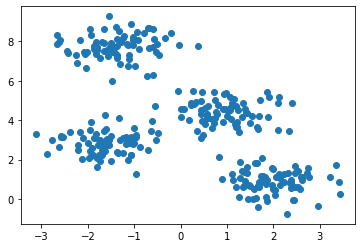

In [6]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

# create a sample dataset with 300 data points and 4 cluster centers
X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

# plot the data
plt.scatter(X[:, 0], X[:, 1])

In [7]:
from sklearn.cluster import KMeans

# k-means algorithm where k = 4
km = KMeans(n_clusters=4)
# perform k-means clustering on the previous dataset
km.fit(X)
# print the 4 cluster centers
print(km.cluster_centers_)

[[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]]


In [20]:
import numpy as np
import math

def dist_bet_points(l1):
    for point1 in l1:
        for point2 in l1:
            if point1 == point2:
                break;
            else:
                print(point1)
                print(point2)
                print(math.sqrt(sum([(point1[i]-point2[i])**2 for i in range(len(point1))])))
                
dist_bet_points([(1,1), (2,2), (3,8)])

(2, 2)
(1, 1)
1.4142135623730951
(3, 8)
(1, 1)
7.280109889280518
(3, 8)
(2, 2)
6.082762530298219


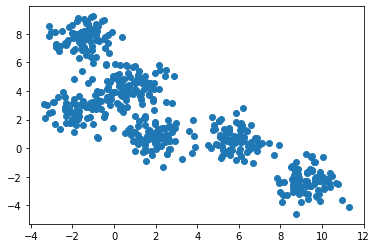

In [21]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

Data, blob_y = make_blobs(n_samples=500, centers=6,
                          random_state=0, cluster_std=0.80)

# plot the data
plt.scatter(Data[:, 0], Data[:, 1])

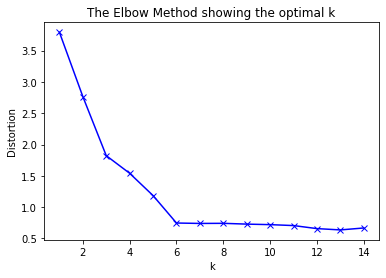

In [26]:
### Distortion
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(Data)

    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

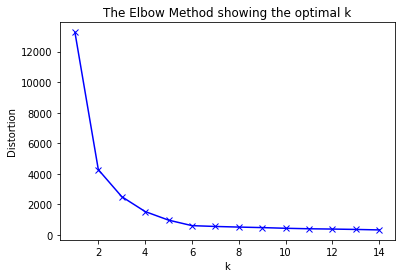

In [27]:
### Inertia
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(Data)

    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [28]:
km = KMeans(n_clusters=6)
km.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
km.cluster_centers_

array([[-1.44009043,  7.74736544],
       [ 9.27835918, -2.34475129],
       [-1.62481677,  2.71044542],
       [ 1.95933556,  0.81808325],
       [ 0.83270144,  4.37475654],
       [ 5.84282983,  0.60912009]])

In [36]:
import collections

collections.Counter(km.labels_)

Counter({1: 83, 3: 82, 0: 82, 5: 83, 2: 78, 4: 92})

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

In [38]:
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(sentences)

print(X.toarray())

[[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [40]:
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
print(km.labels_)

[1 1 0 0 1 1 0 0]


In [43]:
print(collections.Counter(km.labels_))

Counter({1: 4, 0: 4})
